In [1]:
import numpy as np
class GeneticAlgorithm:
    def __init__(self, fitness_func, param_ranges, population_size=20, generations=50):
        self.fitness_func = fitness_func
        self.param_ranges = param_ranges
        self.population_size = population_size
        self.generations = generations

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            individual = [np.random.uniform(low, high) for low, high in self.param_ranges]
            population.append(individual)
        return np.array(population)

    def select_parents(self, population, fitness):
        sorted_idx = np.argsort(fitness)
        return population[sorted_idx][:2]

    def crossover(self, parent1, parent2):
        crossover_point = np.random.randint(len(parent1))
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        return child1, child2

    def mutate(self, individual):
        mutation_idx = np.random.randint(len(individual))
        individual[mutation_idx] = np.random.uniform(*self.param_ranges[mutation_idx])
        return individual

    def run(self):
        population = self.initialize_population()
        for generation in range(self.generations):
            fitness = np.array([self.fitness_func(ind) for ind in population])
            parents = self.select_parents(population, fitness)
            next_population = []
            for _ in range(self.population_size // 2):
                child1, child2 = self.crossover(parents[0], parents[1])
                next_population.extend([self.mutate(child1), self.mutate(child2)])
            population = np.array(next_population)
        best_individual = population[np.argmin([self.fitness_func(ind) for ind in population])]
        return best_individual

Độ chính xác của mô hình SVC trước khi được tối ưu hóa bởi GA: 0.7692307692307693
Độ chính xác của mô hình SVC sau khi được tối ưu hóa bởi GA: 0.8181818181818182


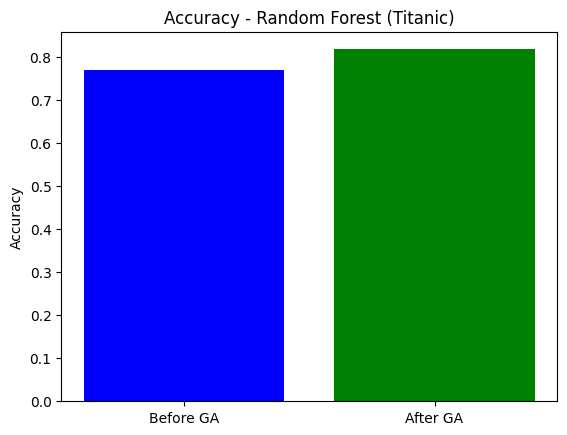

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Tải Titanic Dataset
titanic = sns.load_dataset("titanic")
titanic = titanic.dropna(subset=["age", "fare", "embarked", "sex"])
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Chọn biến đầu vào và nhãn
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trước GA
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
acc_before = accuracy_score(y_test, y_pred)

# Sau khi tối ưu hóa bằng GA
def rf_ga(params):
    model = RandomForestClassifier(n_estimators=int(params[0]), max_depth=int(params[1]), random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return -accuracy_score(y_test, pred)  # Dùng -accuracy vì GA tìm giá trị nhỏ nhất

ga_rf = GeneticAlgorithm(fitness_func=rf_ga, param_ranges=[[50, 200], [5, 20], [2, 10], [0.1, 1.0]], population_size=20, generations=30)
best_rf_params = ga_rf.run()
rf_model_ga = RandomForestClassifier(n_estimators=int(best_rf_params[0]), max_depth=int(best_rf_params[1]), random_state=42)
rf_model_ga.fit(X_train, y_train)
y_pred_ga = rf_model_ga.predict(X_test)
acc_after = accuracy_score(y_test, y_pred_ga)

# Plotting
print(f"Độ chính xác của mô hình SVC trước khi được tối ưu hóa bởi GA: {acc_before}")
print(f"Độ chính xác của mô hình SVC sau khi được tối ưu hóa bởi GA: {acc_after}")

plt.bar(['Before GA', 'After GA'], [acc_before, acc_after], color=['blue', 'green'])
plt.title('Accuracy - Random Forest (Titanic)')
plt.ylabel('Accuracy')
plt.show()
